<a href="https://colab.research.google.com/github/WarunaDissanayake1234/Big-Mart-Sales-Prediction./blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
BigMart Sales dataset link:https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data
```

Impoting dependencies

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Processing

In [2]:
# Load the dataset

big_mart_dataset = pd.read_csv('/content/Train.csv')

In [3]:
big_mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
big_mart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
big_mart_dataset.shape

(8523, 12)

Catogorical Featurea:


*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type












In [6]:
# missing values
big_mart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Mean(Neumerical)--> average vlaue

Mode(Text)--> Most Repeated value

In [7]:
# missing values of "Item_Weight" Column
big_mart_dataset['Item_Weight'].mean()

12.857645184135976

In [8]:
# filling the missing values in "Item_Weight" column with "Mean" value
big_mart_dataset['Item_Weight'].fillna(big_mart_dataset['Item_Weight'].mean(), inplace = True)

In [9]:
# missing values
big_mart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# handling missing values of "Outlet_Size " Column with mode
mode_of_outlet_size = big_mart_dataset.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [11]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [45]:
print(type(big_mart_dataset['Outlet_Size']))

<class 'pandas.core.series.Series'>


In [12]:
missing_values =big_mart_dataset['Outlet_Size'].isnull()

In [13]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [14]:
big_mart_dataset.loc[missing_values, 'Outlet_Size'] = big_mart_dataset.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [15]:
# missing values
big_mart_dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [16]:
big_mart_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
# Neumarical Features
sns.set()

<Figure size 600x600 with 0 Axes>

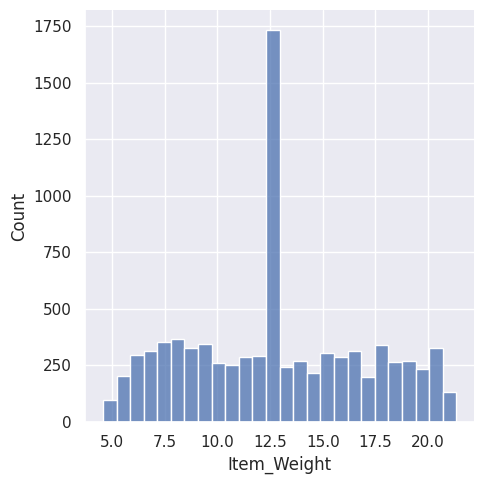

In [22]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_dataset['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

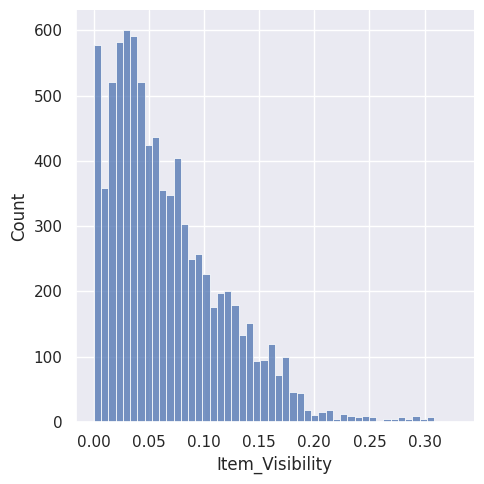

In [23]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_dataset['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

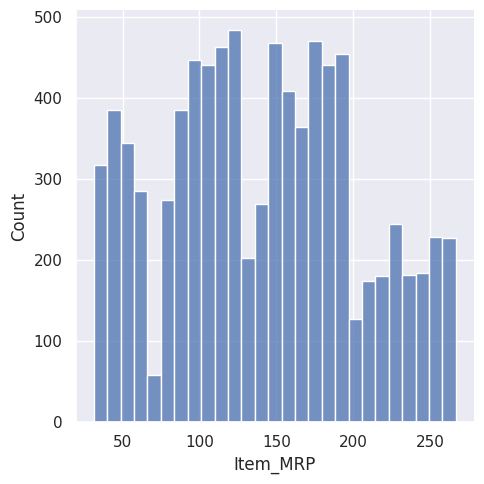

In [24]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_dataset['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

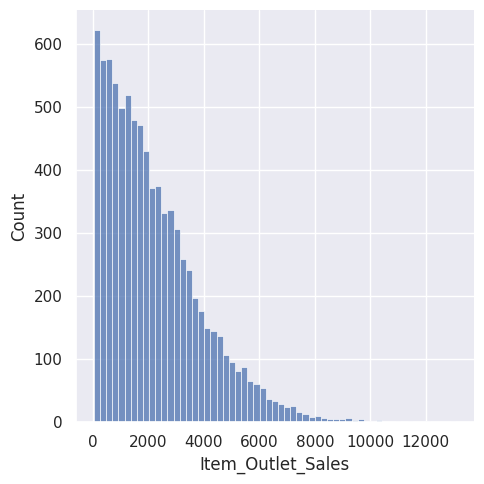

In [26]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_dataset['Item_Outlet_Sales'])
plt.show()

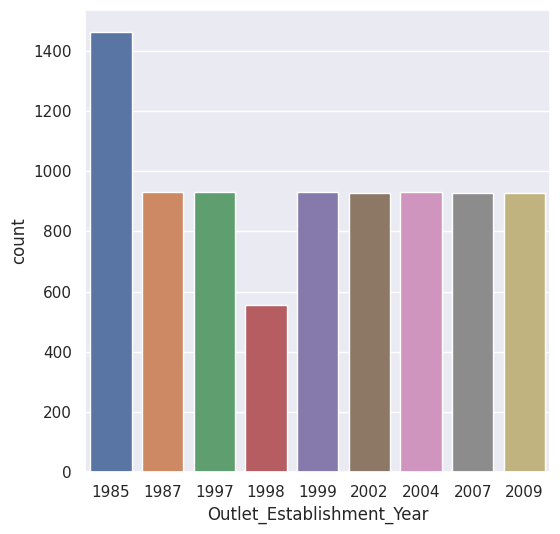

In [29]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_dataset)
plt.show()

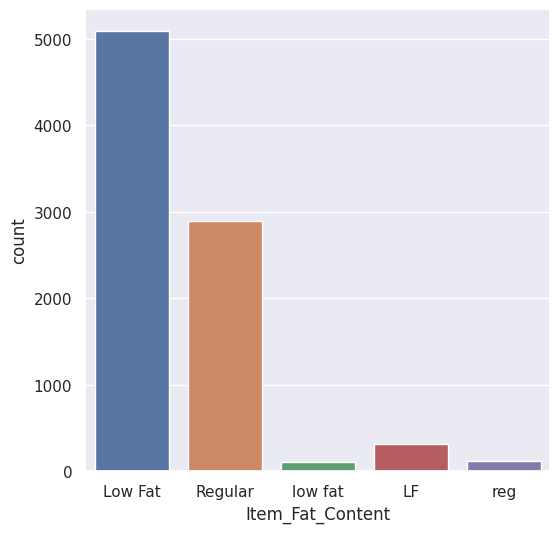

In [30]:
# Categorical Features

# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_dataset)
plt.show()

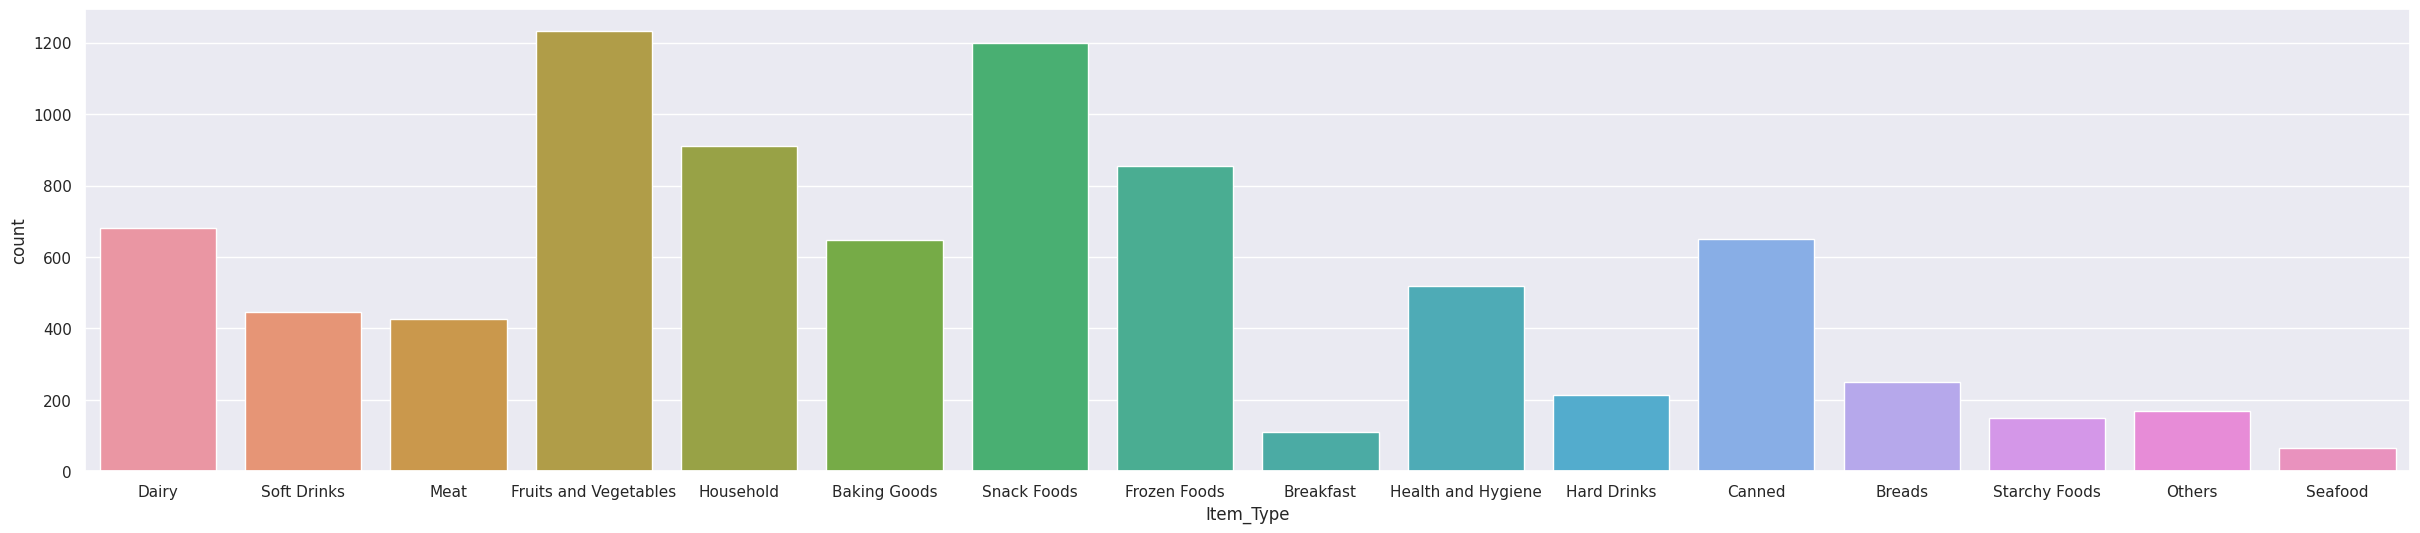

In [31]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_dataset)
plt.show()

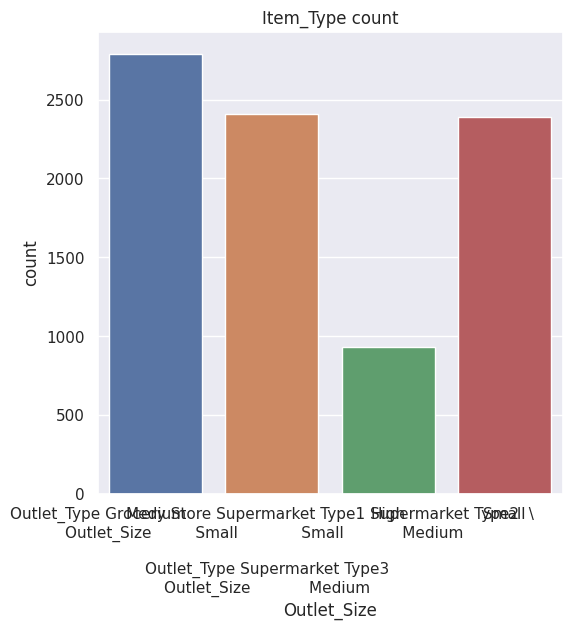

In [46]:
# Convert the complex data types to strings
big_mart_dataset['Outlet_Size'] = big_mart_dataset['Outlet_Size'].astype(str)

# Now plot the countplot
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_dataset)
plt.title('Item_Type count')
plt.show()

Data Preprocessing

In [47]:
big_mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052


In [48]:
big_mart_dataset['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [49]:
big_mart_dataset.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace=True)

In [50]:
big_mart_dataset['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64


**Label Encoding**

Item_Fat_Content

Item_Type

Outlet_Size

Outlet_Location_Type

Outlet_Type

In [51]:
encoder = LabelEncoder()


In [52]:
big_mart_dataset['Item_Identifier'] = encoder.fit_transform(big_mart_dataset['Item_Identifier'])

big_mart_dataset['Item_Fat_Content'] = encoder.fit_transform(big_mart_dataset['Item_Fat_Content'])

big_mart_dataset['Item_Type'] = encoder.fit_transform(big_mart_dataset['Item_Type'])

big_mart_dataset['Outlet_Identifier'] = encoder.fit_transform(big_mart_dataset['Outlet_Identifier'])

big_mart_dataset['Outlet_Size'] = encoder.fit_transform(big_mart_dataset['Outlet_Size'])

big_mart_dataset['Outlet_Location_Type'] = encoder.fit_transform(big_mart_dataset['Outlet_Location_Type'])

big_mart_dataset['Outlet_Type'] = encoder.fit_transform(big_mart_dataset['Outlet_Type'])


Splitting features and Target and Traing the data

In [53]:
X = big_mart_dataset.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_dataset['Item_Outlet_Sales']

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 3)

In [114]:
print(X.shape, X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [115]:
# lets traing the model
# XGBoost Regressor

mart_model = XGBRegressor()

In [116]:
mart_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Lets evaluate the model

In [117]:
# Prediction on training data
training_data_predication = mart_model.predict(X_train)

In [118]:
# R Squard Error
r2_train = metrics.r2_score(Y_train,training_data_predication)

In [119]:
print('R Squard value = ', r2_train)

R Squard value =  0.875643195582602


In [120]:
# Prediction on testing data
testing_data_predication = mart_model.predict(X_test)

In [121]:
# R Squard Error
r2_test = metrics.r2_score(Y_test,testing_data_predication)

In [122]:
print('R Squard value = ', r2_test)

R Squard value =  0.5613058670537636
